# Практика по статистическим тестам

Автор: **Булыгин Олег**
* [Я в LinkedIn](https://www.linkedin.com/in/obulygin/)  
* [Мой канал в ТГ по Python](https://t.me/pythontalk_ru)
* [Чат канала](https://t.me/pythontalk_chat)

In [166]:
import numpy as np
import scipy.stats as st
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

Никакие экспериментально полученные данные никогда **не подтвердят** какую-либо гипотезу. Это является фундаментальным ограничением. Данные могут лишь не противоречить гипотезе или, наоборот, показывать очень маловероятные результаты (при условии, что гипотеза верна). Но и в том, и в другом случае никогда нет оснований утверждать, что выдвинутая гипотеза **доказана**.

1) Нужно сформулировать нулевую и альтернативную гипотезы;   
2) Определить пороговый уровень статистической значимости;  
3) Сколько у нас выборок (какой вариант теста используем)?  
3) Нужен ли односторонний, либо двухсторонний вариант теста?  https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/  
4) Выборки связаны или нет?

## Параметрические тесты
### Тест Стьюдента для независмых выборок

Проверка среднего значения двух выборок или одной выборки с целевым значением

Допущения

* Наблюдения внутри каждой выборки независимы друг от друга.
* Есть распространённое мнение, что данный тест требует нормального распределения, но это не совсем так. Если данных не мало, то требуется нормальное распределение выборочных средних, которое соблюдается почти всегда (кроме распределения Коши).
* Одинаковая вариация в выборках.

Гипотеза

* H0: Средние выборок одинаковы / Средние выборки совпадает с целевым значением
* H1: Средние выборок различаются / Средние выборки отличается от целевого значения

#### Одновыборочный тест

<b>Пример.</b> Мы анализируем концентрацию мелких частиц PM2.5 (твёрдые частицы размером 2,5 микрометра и меньше
) в воздухе города за последний месяц и сравниваем её с нормативом Всемирной организации здравоохранения (ВОЗ).


Генерируем случайные значения концентрации PM2.5 для 30 дней (имитация месяца наблюдений).

In [167]:
np.random.seed(42)

# Генерируем данные о концентрации PM2.5 (мкг/м³) в городе за последний месяц
city_pm25 = st.norm.rvs(loc=25, scale=5, size=30)

# Установленный ВОЗ среднегодовой норматив PM2.5
who_guideline = 10

In [168]:
# Проводим одновыборочный t-тест
stat, p = st.ttest_1samp(a=city_pm25, popmean=who_guideline)

print(f"Средняя концентрация PM2.5 в городе: {city_pm25.mean():.2f} мкг/м³")
print(f"Норматив ВОЗ: {who_guideline} мкг/м³")
print(f"Статистика t = {stat:.3f}, p-значение = {p:.6f}")

alpha = 0.05
if p < alpha:
    print("Отвергаем нулевую гипотезу.")
    print("Концентрация PM2.5 в городе статистически значимо отличается от норматива ВОЗ.")
else:
    print("Не отвергаем нулевую гипотезу.")
    print("Нет статистически значимых доказательств отличия концентрации PM2.5 от норматива ВОЗ.")

Средняя концентрация PM2.5 в городе: 24.06 мкг/м³
Норматив ВОЗ: 10 мкг/м³
Статистика t = 17.112, p-значение = 0.000000
Отвергаем нулевую гипотезу.
Концентрация PM2.5 в городе статистически значимо отличается от норматива ВОЗ.


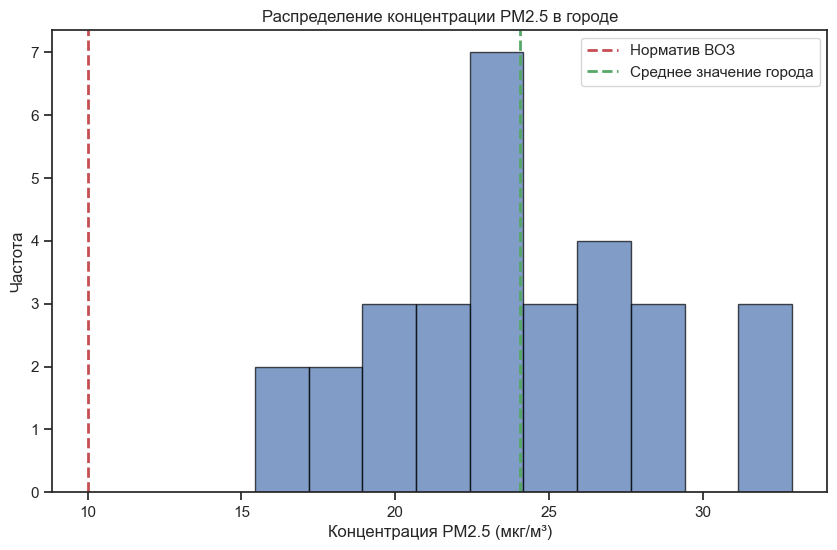

In [169]:
# Визуализация данных
plt.figure(figsize=(10, 6))
plt.hist(city_pm25, bins=10, edgecolor='black', alpha=0.7)
plt.axvline(who_guideline, color='r', linestyle='dashed', linewidth=2, label='Норматив ВОЗ')
plt.axvline(city_pm25.mean(), color='g', linestyle='dashed', linewidth=2, label='Среднее значение города')
plt.xlabel('Концентрация PM2.5 (мкг/м³)')
plt.ylabel('Частота')
plt.title('Распределение концентрации PM2.5 в городе')
plt.legend()
plt.show('png')

#### Тест для двух выборок

<b>Пример.</b> Такой тест показывает, имеют ли две выборки разные средние значения. Здесь нулевая гипотеза заключается в том, что обе группы имеют равные средние.

In [170]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/netology_pyda_files/main/apple_samsung.csv')
df

,Sr No,S_Cust_id,Samsung_Score,Apple_Cust_id,Apple_Score
0,1,S336499,94,A336525,82
1,2,S73004,99,A73011,83
2,3,S79537,74,A79538,88
3,4,S769168,74,A769222,80
4,5,S609791,83,A609801,74
...,...,...,...,...,...
95,96,S285617,77,A285629,87
96,97,S324135,85,A324151,82
97,98,S292076,83,A292091,88
98,99,S936528,82,A936566,91


In [171]:
stat, p = st.ttest_ind(df['Samsung_Score'], df['Apple_Score'])
print(df['Samsung_Score'].mean())
print(df['Apple_Score'].mean())
print(f"Статистика = {stat:.5f}, p = {p:.5f}")
if (p < 0.05):
    print('Отвергаем нулевую гипотезу, клиенты по разному относятся к продукции Apple и Samsung')
else:
    print('Не отвергаем нулевую гипотезу')

84.9
87.81
Статистика = -1.90643, p = 0.05804
Не отвергаем нулевую гипотезу


По умолчанию критерий Стьюдента подразумевает равенство дисперсий двух выборок. Если дисперсии отличаются (можно проверить с помощью F-теста), то нужно использовать поправку Уэлча (Welch). В scipy это реализовано через параметр функции ttest_ind: `equal_var = False`.

Существует [мнение](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html), что использование критерия Уэлча всегда предпочтительнее, будем придерживаться этой позиции.

In [172]:
stat, p = st.levene(df['Samsung_Score'], df['Apple_Score'])

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

print(df['Samsung_Score'].var())
print(df['Apple_Score'].var())

if p < 0.05:
    print("Отклоняем нулевую гипотезу >> Вариация в группах различается")
else:
    print("Не отклоняем нулевую гипотезу >> Вариация в группах одинаковая")

Статистика = 8.92062, p = 0.00318
140.2929292929293
92.70090909090908
Отклоняем нулевую гипотезу >> Вариация в группах различается


In [173]:
stat, p = st.ttest_ind(df['Samsung_Score'], df['Apple_Score'], equal_var=False)
print(df['Samsung_Score'].mean())
print(df['Apple_Score'].mean())
print(f"Статистика = {stat:.5f}, p = {p:.5f}")
if (p < 0.05):
    print('Отвергаем нулевую гипотезу, клиенты по разному относятся к продукции Apple и Samsung')
else:
    print('Не отвергаем нулевую гипотезу')

84.9
87.81
Статистика = -1.90643, p = 0.05810
Не отвергаем нулевую гипотезу


(array([ 1.,  1.,  0.,  1.,  2.,  2.,  3.,  2.,  0.,  1.,  3.,  5.,  2.,
         8.,  4.,  6.,  3., 13.,  2.,  7.,  2.,  7.,  2.,  2., 21.]),
 array([ 62.  ,  63.52,  65.04,  66.56,  68.08,  69.6 ,  71.12,  72.64,
         74.16,  75.68,  77.2 ,  78.72,  80.24,  81.76,  83.28,  84.8 ,
         86.32,  87.84,  89.36,  90.88,  92.4 ,  93.92,  95.44,  96.96,
         98.48, 100.  ]),
 <BarContainer object of 25 artists>)

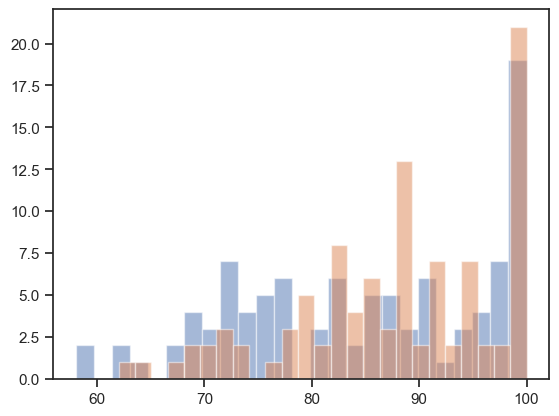

In [174]:
plt.hist(df['Samsung_Score'], bins=25, alpha=0.5)
plt.hist(df['Apple_Score'], bins=25, alpha=0.5)

### Тест Стьюдента для зависимых выборок
Сравнивает средние значения при связанных данных.

Допущения
* Одинаковая вариация в выборках.
* Наблюдения связаны попарно в двух выборках

Гипотеза

* H0: Средние выборок одинаковы.
* H1: Средние выборок различаются.

Примеры парных выборок не являющимися замерами "до-после":

Сравнение левой и правой сторон тела:
- Сила сжатия кисти левой и правой руки у теннисистов
- Острота зрения левого и правого глаза
- Длина ног у людей


Сравнение близнецов:
- IQ однояйцевых близнецов, выросших в разных семьях
- Вес близнецов, придерживающихся разных диет


Сравнение супружеских пар:
- Уровень удовлетворенности браком у мужей и жен
- Расходы на личные нужды у супругов


Оценка разных методов или инструментов:
- Измерение артериального давления разными приборами у одних и тех же пациентов
- Оценки студентов по одному предмету, выставленные двумя разными преподавателями


Сравнение родителей и детей:
- Рост родителей и их взрослых детей
- Музыкальные способности родителей и детей

<b>Пример.</b> Мы анализируем уровень стресса у 50 студентов до и после прохождения специальной программы по управлению стрессом во время экзаменационной сессии.

In [175]:
# Генерируем данные об уровне стресса до программы (по шкале от 0 до 100)
stress_before = st.norm.rvs(loc=70, scale=10, size=50)

# Генерируем данные об уровне стресса после программы
# Предполагаем некоторое снижение стресса, но с индивидуальными различиями
stress_after = stress_before - st.norm.rvs(loc=15, scale=5, size=50)
stress_after = np.clip(stress_after, 0, 100)  # Ограничиваем значения от 0 до 100

# Создаем DataFrame
stress_df = pd.DataFrame({
    "студент": range(1, 51),
    "стресс_до": stress_before,
    "стресс_после": stress_after,
    "изменение": stress_after - stress_before
})
stress_df

,студент,стресс_до,стресс_после,изменение
0,1,63.982934,50.081293,-13.901641
1,2,88.522782,71.737219,-16.785563
2,3,69.865028,47.475558,-22.389470
3,4,59.422891,47.014242,-12.408649
4,5,78.225449,67.267917,-10.957532
5,6,57.791564,45.300349,-12.491215
6,7,72.088636,52.511625,-19.577011
7,8,50.403299,33.759543,-16.643756
8,9,56.718140,44.366941,-12.351199
9,10,71.968612,54.402275,-17.566337


In [176]:
# Проводим парный t-тест
stat, p = st.ttest_rel(a=stress_before, b=stress_after)

print("Статистика описания данных:")
print(stress_df.describe())

print(f"\nt-статистика = {stat:.3f}, p-значение = {p:.6f}")

alpha = 0.05
if p < alpha:
    print("Отвергаем нулевую гипотезу.")
    print("Есть статистически значимое различие в уровне стресса до и после программы.")
else:
    print("Не отвергаем нулевую гипотезу.")
    print("Нет статистически значимого различия в уровне стресса до и после программы.")



Статистика описания данных:
        студент  стресс_до  стресс_после  изменение
count  50.00000  50.000000     50.000000  50.000000
mean   25.50000  69.147439     54.036822 -15.110617
std    14.57738   9.973057     11.223914   4.576906
min     1.00000  43.802549     25.868263 -27.316211
25%    13.25000  63.310286     47.513610 -16.961581
50%    25.50000  69.753384     54.014774 -14.846936
75%    37.75000  77.067690     62.194230 -12.427142
max    50.00000  88.522782     77.655692  -5.406144

t-статистика = 23.345, p-значение = 0.000000
Отвергаем нулевую гипотезу.
Есть статистически значимое различие в уровне стресса до и после программы.


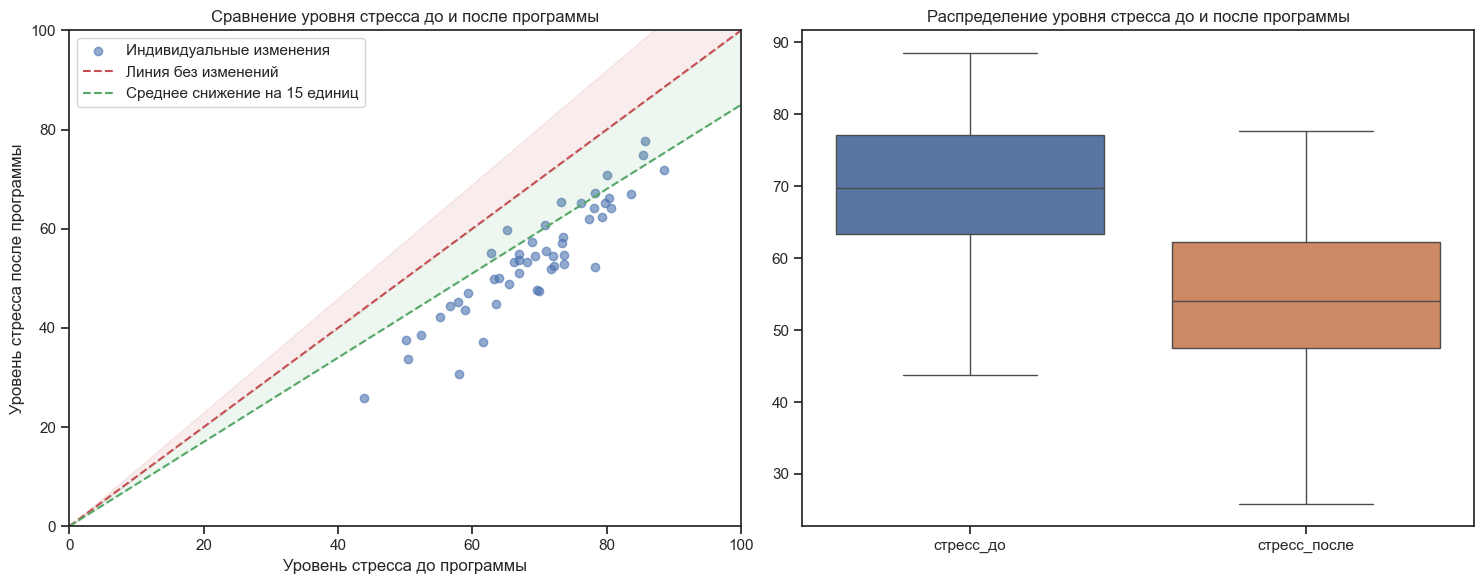

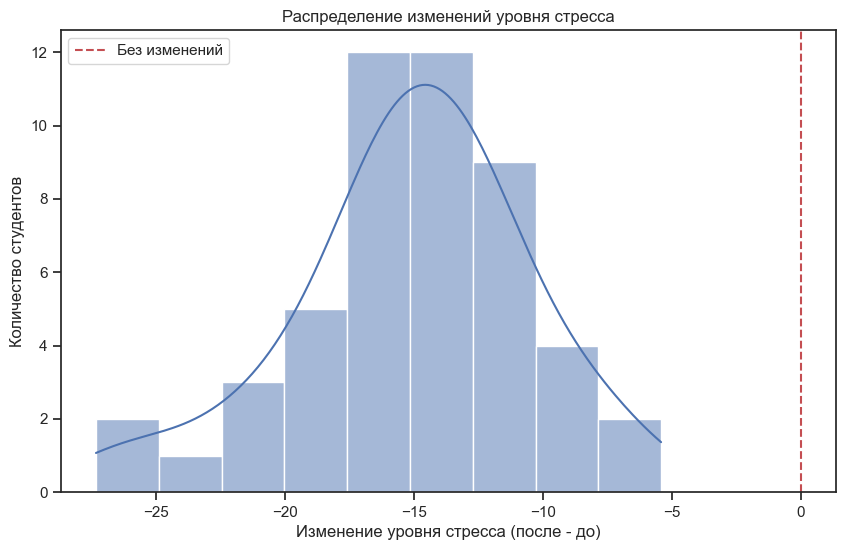

In [177]:
plt.figure(figsize=(15, 6))

# График "до-после" с улучшениями
plt.subplot(1, 2, 1)
plt.scatter(stress_before, stress_after, alpha=0.6, label='Индивидуальные изменения')
plt.plot([0, 100], [0, 100], 'r--', label='Линия без изменений')
plt.plot([0, 100], [0, 85], 'g--', label='Среднее снижение на 15 единиц')

plt.xlabel("Уровень стресса до программы")
plt.ylabel("Уровень стресса после программы")
plt.title("Сравнение уровня стресса до и после программы")
plt.legend()

# Добавляем диагональные линии для обозначения зон
plt.fill_between([0, 100], [0, 100], [0, 85], alpha=0.1, color='g', label='Зона снижения стресса')
plt.fill_between([0, 100], [0, 100], [0, 115], alpha=0.1, color='r', label='Зона повышения стресса')

plt.xlim(0, 100)
plt.ylim(0, 100)

# Ящик с усами для изменения уровня стресса
plt.subplot(1, 2, 2)
sns.boxplot(data=stress_df[["стресс_до", "стресс_после"]])
plt.title("Распределение уровня стресса до и после программы")

plt.tight_layout()
plt.show('png')

# Добавим гистограмму изменений
plt.figure(figsize=(10, 6))
sns.histplot(data=stress_df, x="изменение", kde=True)
plt.axvline(x=0, color='r', linestyle='--', label='Без изменений')
plt.xlabel("Изменение уровня стресса (после - до)")
plt.ylabel("Количество студентов")
plt.title("Распределение изменений уровня стресса")
plt.legend()
plt.show('png')

### А если распределение не нормальное?
В этом случае можно использовать непараметрические тесты или преобразования данных. С преобразованиями данных нужно быть аккуратнее, так как после преобразования меняется масштаб данных и единицы измерения, что может затруднять интерпретацию.

## Непараметрические тесты



### Тест Манна-Уитни
Критерий Манна-Уитни представляет непараметрическую альтернативу критерия Стьюдента для независимых выборок и используется для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно.


Давайте рассмотрим пример с данными, которые явно не распределены нормально. Предположим, у нас есть данные о времени реакции участников двух разных групп на стрессовое событие. Одна группа прошла специальную тренировку по управлению стрессом (группа A), а другая — нет (группа B).


In [178]:
import numpy as np
from scipy.stats import mannwhitneyu, shapiro

group_A = np.random.exponential(scale=0.3, size=100)  # Экспоненциальное распределение для группы A
group_B = np.random.exponential(scale=0.5, size=100)  # Экспоненциальное распределение для группы B

# Проверка на нормальность с использованием теста Шапиро-Уилка
stat, p = shapiro(group_A)
print(p)

stat, p = shapiro(group_B)
print(p)

# Применение теста Манна-Уитни
stat, p = mannwhitneyu(group_A, group_B)
print(f'Mann-Whitney U test: Statistics={stat:.3f}, p={p:.3f}')

# Интерпретация результатов
alpha = 0.05
if p > alpha:
    print(f'Принимаем нулевую гипотезу: время реакции не различается между группами.')
else:
    print(f'Отвергаем нулевую гипотезу: время реакции различается между группами.')

1.5671386217424194e-07
4.970268566010238e-08
Mann-Whitney U test: Statistics=4129.000, p=0.033
Отвергаем нулевую гипотезу: время реакции различается между группами.


### Тест Вилкоксона
Тест Вилкоксона - это непараметрический аналог парного критерия Стьюдента.

Предположим, у нас есть данные о результатах тестов до и после проведения специальной тренировки памяти для одной группы участников. Мы хотим определить, существуют ли статистически значимые различия в результатах тестов до и после тренировки.

In [179]:
import numpy as np
from scipy.stats import wilcoxon

# Пример данных: результаты тестов до и после тренировки памяти
before = [23, 20, 22, 21, 24, 23, 22, 21, 20, 22]
after = [25, 24, 26, 25, 27, 26, 25, 24, 23, 25]

# Применение теста Вилкоксона
stat, p = wilcoxon(before, after)
print(f'Wilcoxon signed-rank test: Statistics={stat:.3f}, p={p:.3f}')

# Интерпретация результатов
alpha = 0.05
if p > alpha:
    print(f'Принимаем нулевую гипотезу: результаты тестов не различаются до и после тренировки.')
else:
    print(f'Отвергаем нулевую гипотезу: результаты тестов различаются до и после тренировки.')

Wilcoxon signed-rank test: Statistics=0.000, p=0.002
Отвергаем нулевую гипотезу: результаты тестов различаются до и после тренировки.


### Точный критерий Фишера
это статистический тест, используемый для анализа таблиц сопряженности 2x2, когда ожидаемые частоты в любой из ячеек таблицы сопряженности меньше 5. Этот тест особенно полезен, когда размер выборки невелик.  

Гипотеза:
* H0: Выборки независимы.
* H1: Есть некторая зависимость.

Критерий Фишера дает точные результаты, даже если размер выборки невелик, что делает его подходящим для анализа данных с небольшим количеством наблюдений.

<b>Пример.</b> Предположим, у нас есть данные о том, как студенты двух разных университетов ответили на вопрос о поддержке определенной политики. Мы хотим определить, существует ли статистически значимая связь между университетом и поддержкой этой политики.

In [180]:
import numpy as np
from scipy.stats import fisher_exact

# Пример данных: таблица сопряженности 2x2
data = np.array([[20, 5],  # Университет A: поддерживают, не поддерживают
                 [10, 15]]) # Университет B: поддерживают, не поддерживают

# Применение точного критерия Фишера
odds_ratio, p = fisher_exact(data)
print(f'p={p:.3f}')

# Интерпретация результатов
alpha = 0.05
if p < alpha:
    print(f'Принимаем нулевую гипотезу: нет статистически значимой связи.')
else:
    print(f'Отвергаем нулевую гипотезу: есть статистически значимая связь.')

p=0.009
Принимаем нулевую гипотезу: нет статистически значимой связи.


### Тест Хи-квадрат
Например, вы хотите проверить правда ли эксперт по Data Science таковым является. Вы составили список вопросов, спросили эксперта и случайных прохожих. Количество правильный вопросов по каждому разделу вы записали в таблицу (таблица сопряженности).

Выясните, исходя из полученных данных, действительно ли перед вами носитель экспертности или пока что еще не очень опытный начинаюший?

In [181]:
contingency_table = pd.DataFrame(
    [
[22, 99, 59],
[10, 12, 31]
    ],
    columns = ['Machine Learning', 'Data Science', 'Analytics'],
    index = ['Эксперт', 'Случайный прохожий'])

print('Реальная таблица')
print(contingency_table)

Реальная таблица
                    Machine Learning  Data Science  Analytics
Эксперт                           22            99         59
Случайный прохожий                10            12         31


In [182]:

chi, pval, dof, exp = st.chi2_contingency(contingency_table.values) #Критерий Пирсона (хи квадрат)
significance = 0.05

print(f"p-value = {pval:.6f}, уровень значимости = {significance:.2f}")

print(pval)
if pval < significance:
    print(f"На уровене значимости {significance:.2f}, мы отвергаем нулевые гипотезы и принимаем H1. Они не независимы.")
    print('Это правда эксперт!')
else:
    print(f"На уровене значимости {significance:.2f}, мы не отвергаем нулевые гипотезы. Они независимы.")

# Возвращает:
# chi2 : Посчитанную статистику теста.
# p :  p-value теста
# dof : Степени свободы
# expected : Ожидаемые частоты, основанные на предельных суммах таблицы.

p-value = 0.000173, уровень значимости = 0.05
0.00017303774198262263
На уровене значимости 0.05, мы отвергаем нулевые гипотезы и принимаем H1. Они не независимы.
Это правда эксперт!


## Пример проведения A/B теста

Вы работаете в команде разработчиков **онлайн-бизнеса электронной коммерции**. UX-дизайнер очень усердно работал над новой версией страницы продукта в надежде, что это приведет к более высокому коэффициенту конверсии. Менеджер по продукту сказал вам, что **текущий коэффициент конверсии** составляет около **12%** в среднем в течение года и что команда была бы рада **увеличению на 2%**, что означает, что новый дизайн будет считаться успешным, если он поднимет коэффициент конверсии до 14%.

Прежде чем внедрять изменение, команде было бы удобнее протестировать его на небольшом количестве пользователей, чтобы увидеть, как оно работает, поэтому вы предлагаете провести **A/B-тест** на подмножестве пользователей вашей пользовательской базы.

### 1. Планирование эксперимента

Прежде всего, необходимо сформулировать нулевую гипотезу, чтобы не ошибиться при интерпретации результатов.

Поскольку мы не знаем, будет ли новый дизайн работать лучше или хуже, или будет таким же, как наш текущий дизайн, мы выберем <a href="https://en.wikipedia.org/wiki/One-_and_two-tailed_tests">**двусторонний тест**</a>:

$$H_0: p = p_0$$
$$H_a: p \ne p_0$$

где $p$ и $p_0$ — коэффициент конверсии нового и старого дизайна соответственно. Мы также установим **уровень достоверности 95%**:

$$\alpha = 0,05$$

### 2. Сбор и подготовка данных

У нас есть **290583 строк**, каждая из которых представляет сеанс пользователя, а также **5 столбцов**:
* `user_id` - идентификатор пользователя каждой сессии
* `timestamp` - Отметка времени сеанса
* `group` — к какой группе был отнесен пользователь для этого сеанса {`control`, `treatment`}
* `converted` - закончился ли сеанс конверсией или нет (двоичный, `0`=не преобразовано, `1`=конвертировано)

Мы будем использовать для анализа только столбцы «group» и «converted».

In [183]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/SkillFactory/main/ab_example.csv')
df

,user_id,timestamp,group,converted
0,851104,2017-01-21 22:11:48.556739,control,0
1,804228,2017-01-12 08:01:45.159739,control,0
2,661590,2017-01-11 16:55:06.154213,treatment,0
3,853541,2017-01-08 18:28:03.143765,treatment,0
4,864975,2017-01-21 01:52:26.210827,control,1
...,...,...,...,...
290578,751197,2017-01-03 22:28:38.630509,control,0
290579,945152,2017-01-12 00:51:57.078372,control,0
290580,734608,2017-01-22 11:45:03.439544,control,0
290581,697314,2017-01-15 01:20:28.957438,control,0


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290583 entries, 0 to 290582
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    290583 non-null  int64 
 1   timestamp  290583 non-null  object
 2   group      290583 non-null  object
 3   converted  290583 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ MB


In [185]:
df.groupby('group')['converted'].count()

group
control      145274
treatment    145309
Name: converted, dtype: int64



Прежде чем мы приступим к выборке данных для получения нашего подмножества, давайте удостоверимся, что нет пользователей, которые были отобраны несколько раз.

In [186]:
session_counts = df['user_id'].value_counts(ascending=False)
multi_users = session_counts[session_counts > 1].count()

print(f'В нашем наборе данных присутствует {multi_users} повторений пользователей по ID')

В нашем наборе данных присутствует 0 повторений пользователей по ID


### 3. Расчет конверсии

In [187]:
conversion_rates = df.groupby('group')['converted']

std_p = lambda x: np.std(x, ddof=0)
se_p = lambda x: st.sem(x, ddof=0)            # (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['конверсия', 'сред. кв. отклонение', 'ошибка среднего']


conversion_rates

C:\Users\user\AppData\Local\Temp\ipykernel_3580\174263706.py:6: FutureWarning: The provided callable <function mean at 0x00000178A48542C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])


,конверсия,сред. кв. отклонение,ошибка среднего
group,,,
control,0.120386,0.325413,0.000854
treatment,0.118809,0.323563,0.000849


Судя по приведенной выше статистике, похоже, что **наши два проекта работали очень похоже**, а наш новый дизайн работал немного хуже - **коэффициент конверсии 11,9% против 12%**.

 **Является ли эта разница *статистически значимой***?

### 4. Проверка гипотезы

Последним шагом нашего анализа является проверка нашей гипотезы. Так как у нас очень большая выборка, мы можем использовать <a href="https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval#Normal_ приблизительно_interval">нормальное приближение</a> для расчета нашего значения $p$ (т.е. z-тест).

Опять же, Python делает все вычисления очень простыми. Мы можем использовать модуль `statsmodels.stats.proportion`, чтобы получить значение $p$ и доверительные интервалы:

In [188]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [189]:
control_results = df[df['group'] == 'control']['converted']
treatment_results = df[df['group'] == 'treatment']['converted']

In [190]:
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z-статистика: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ДИ 95% для контрольной группы: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ДИ 95% для тестовой группы: [{lower_treat:.3f}, {upper_treat:.3f}]')

z-статистика: 1.31
p-value: 0.190
ДИ 95% для контрольной группы: [0.119, 0.122]
ДИ 95% для тестовой группы: [0.117, 0.120]


### 5. Выводы

Поскольку наше значение $p=0.19$ намного превышает наше значение $\alpha=0.05$, мы не можем отвергнуть нулевую гипотезу $H_0$, а это означает, что наш новый дизайн не имел существенных отличий (не говоря уже о лучшем) от нашего старого. :(

Кроме того, если мы посмотрим на доверительный интервал для тестовой группы ( [0.117, 0.120]), то заметим, что:
1. Он включает наше базовое значение коэффициента конверсии $12\%$.
2. Он не включает наше целевое значение в $14\%$ ($2\%$ роста, к которому мы стремились).

Это означает, что более вероятно, что истинный коэффициент конверсии нового дизайна будет похож на наш базовый уровень, а не на целевые 14%, на которые мы надеялись. Это еще одно доказательство того, что наш новый дизайн вряд ли будет улучшением нашего старого дизайна!

## Сравнение эффетиквности стратегий в онлайн магазине

Компания представила новую стратегию рекомендаций для своего онлайн магазина. Было решено провести A/B тест для сравнения эффективности новой стратегии с предыдущей. Тест выполнялся в течение одного месяца, были собранны данные от 30 клиентов по каждой стратегии и теперь их необходимо проанализировать.

#### Импорт данных

In [191]:
df_control = pd.read_csv('https://raw.githubusercontent.com/obulygin/content/main/ab_test/control_group.csv', sep = ";")
df_control.head()

,Name,Date,Spent [USD],# of Impressions,Reach,# of Clicks,# of Searches,# of Views,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для удобства можно переименовать столбцы

In [192]:
df_control.rename(columns = {'Name':'Имя', 'Date': 'Дата','Spent [USD]': 'Расход USD',\
                             '# of Impressions':'Кол-во показов','Reach':'Охват','# of Clicks':'Кол-во кликов',\
                             '# of Searches':'Кол-во запросов','# of Views':'Кол-во просмотров',
                             '# of Add to Cart':'В корзине','# of Purchase':'Кол-во покупок'}, inplace = True)

In [193]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Имя                30 non-null     object 
 1   Дата               30 non-null     object 
 2   Расход USD         30 non-null     int64  
 3   Кол-во показов     29 non-null     float64
 4   Охват              29 non-null     float64
 5   Кол-во кликов      29 non-null     float64
 6   Кол-во запросов    29 non-null     float64
 7   Кол-во просмотров  29 non-null     float64
 8   В корзине          29 non-null     float64
 9   Кол-во покупок     29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [194]:
df_test = pd.read_csv('https://raw.githubusercontent.com/obulygin/content/main/ab_test/test_group.csv', sep = ";")
df_test.head()

,Name,Date,Spent [USD],# of Impressions,Reach,# of Clicks,# of Searches,# of Views,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [195]:
df_test.rename(columns = {'Name':'Имя', 'Date': 'Дата','Spent [USD]': 'Расход USD',\
                             '# of Impressions':'Кол-во показов','Reach':'Охват','# of Clicks':'Кол-во кликов',\
                             '# of Searches':'Кол-во запросов','# of Views':'Кол-во просмотров',
                             '# of Add to Cart':'В корзине','# of Purchase':'Кол-во покупок'}, inplace = True)

In [196]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Имя                30 non-null     object
 1   Дата               30 non-null     object
 2   Расход USD         30 non-null     int64 
 3   Кол-во показов     30 non-null     int64 
 4   Охват              30 non-null     int64 
 5   Кол-во кликов      30 non-null     int64 
 6   Кол-во запросов    30 non-null     int64 
 7   Кол-во просмотров  30 non-null     int64 
 8   В корзине          30 non-null     int64 
 9   Кол-во покупок     30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


#### Обработка пропусков в данных

1. Если пропусков мало, то такие строки можно просто удалить

In [197]:
df_drop = df_control.dropna().reset_index(drop = True)

In [198]:
df_drop.describe()

,Расход USD,Кол-во показов,Охват,Кол-во кликов,Кол-во запросов,Кол-во просмотров,В корзине,Кол-во покупок
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2304.068966,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,363.534822,21688.922908,21832.349595,1757.369003,866.089368,777.545469,407.457973,185.028642
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1962.000000,92029.000000,74192.000000,4085.000000,1615.000000,1249.000000,930.000000,372.000000
50%,2319.000000,113430.000000,91579.000000,5224.000000,2390.000000,1984.000000,1339.000000,501.000000
75%,2544.000000,121332.000000,102479.000000,6628.000000,2711.000000,2421.000000,1641.000000,670.000000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


2. Но если данных мало, то стоит поискать альтернативные варианты - например, заполнение похожими значениями

In [199]:
from sklearn.impute import KNNImputer

In [200]:
imputer = KNNImputer()

In [201]:
df_control.iloc[:,2:10] = pd.DataFrame(imputer.fit_transform(df_control.iloc[:,2:10]))

In [202]:
df_control.describe()

,Расход USD,Кол-во показов,Охват,Кол-во кликов,Кол-во запросов,Кол-во просмотров,В корзине,Кол-во покупок
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2288.433333,109186.486667,88498.280000,5335.500000,2218.520000,1943.366667,1300.466667,524.553333
std,367.334451,21409.538119,21536.486222,1728.681554,851.163019,764.025477,400.379366,182.065958
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1945.500000,93612.150000,75255.350000,4122.250000,1629.250000,1249.000000,942.500000,375.500000
50%,2299.500000,112368.000000,91418.000000,5329.500000,2340.000000,1979.500000,1326.500000,506.000000
75%,2532.000000,121259.000000,101958.750000,6609.500000,2655.000000,2360.500000,1638.000000,663.250000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


#### Подготовка данных к анализу

Объединим данные в один фрейм и рассчитаем несколько ключевых характеристик

In [203]:
df = pd.concat([df_test,df_control])
df = df.reset_index()

df['USD за покупку'] = round(df['Расход USD']/df['Кол-во покупок'],2)

df['CTR(%)'] = round(df['Кол-во кликов']*100/df['Кол-во показов'],2)

df['Конверсия(%)'] = round(df['Кол-во покупок']*100/df['Кол-во кликов'],2)

In [204]:
df = df.drop(['index'], axis=1)
df

,Имя,Дата,Расход USD,Кол-во показов,Охват,Кол-во кликов,Кол-во запросов,Кол-во просмотров,В корзине,Кол-во покупок,USD за покупку,CTR(%),Конверсия(%)
0,Test Campaign,1.08.2019,3008.0,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0,11.80,7.68,8.39
1,Test Campaign,2.08.2019,2542.0,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0,3.75,4.62,14.54
2,Test Campaign,3.08.2019,2365.0,70263.0,45198.0,7885.0,2572.0,2367.0,1268.0,578.0,4.09,11.22,7.33
3,Test Campaign,4.08.2019,2710.0,78451.0,25937.0,4216.0,2216.0,1437.0,566.0,340.0,7.97,5.37,8.06
4,Test Campaign,5.08.2019,2297.0,114295.0,95138.0,5863.0,2106.0,858.0,956.0,768.0,2.99,5.13,13.10
5,Test Campaign,6.08.2019,2458.0,42684.0,31489.0,7488.0,1854.0,1073.0,882.0,488.0,5.04,17.54,6.52
6,Test Campaign,7.08.2019,2838.0,53986.0,42148.0,4221.0,2733.0,2182.0,1301.0,890.0,3.19,7.82,21.09
7,Test Campaign,8.08.2019,2916.0,33669.0,20149.0,7184.0,2867.0,2194.0,1240.0,431.0,6.77,21.34,6.00
8,Test Campaign,9.08.2019,2652.0,45511.0,31598.0,8259.0,2899.0,2761.0,1200.0,845.0,3.14,18.15,10.23
9,Test Campaign,10.08.2019,2790.0,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0,10.15,8.55,3.38


#### Визуализация данных

Целью данного этапа яявляется проверка адекватности собранных данных, а также выявление идей для дальнейшего анализа

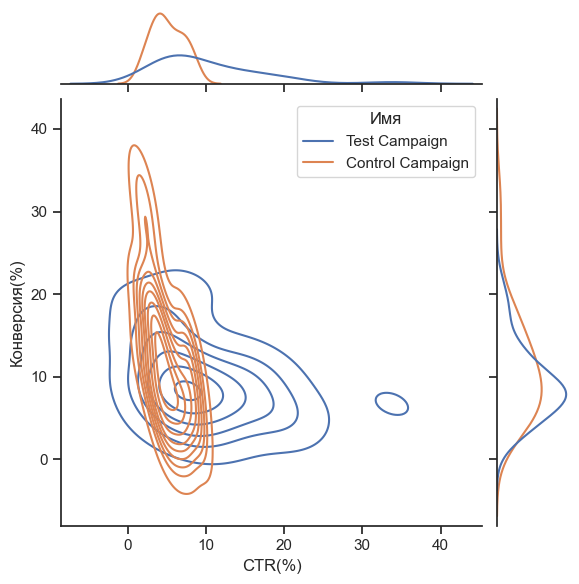

In [205]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="CTR(%)", y="Конверсия(%)", hue="Имя",
    kind="kde",
)
plt.show('png')

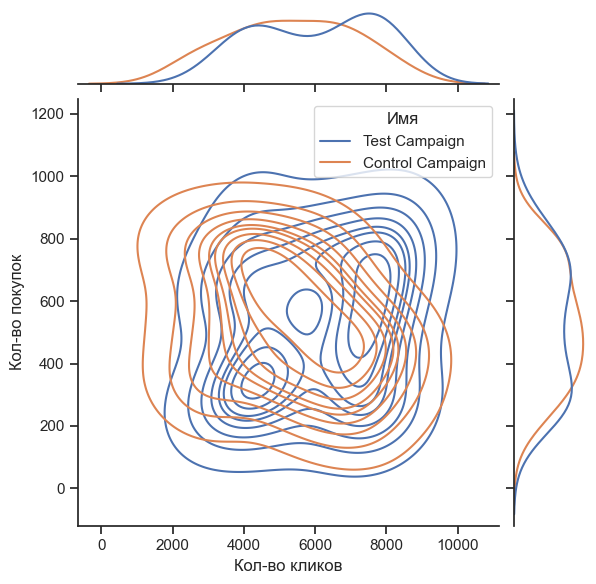

In [206]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="Кол-во кликов", y="Кол-во покупок", hue="Имя",
    kind="kde",
)
plt.show('png')

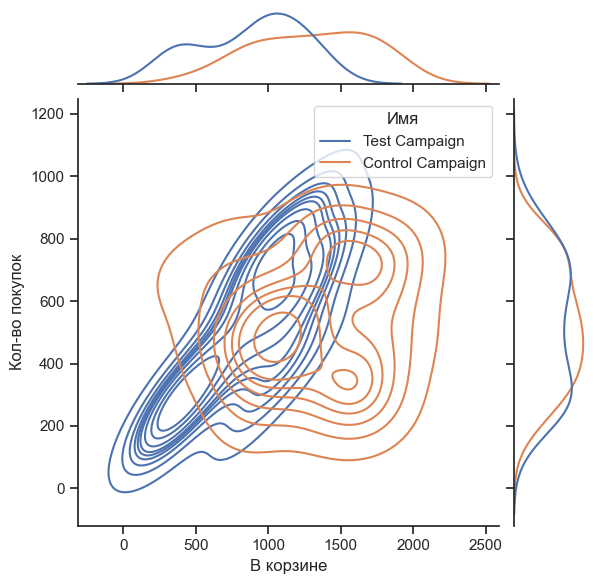

In [207]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="В корзине", y="Кол-во покупок", hue="Имя",
    kind="kde",
)
plt.show('png')

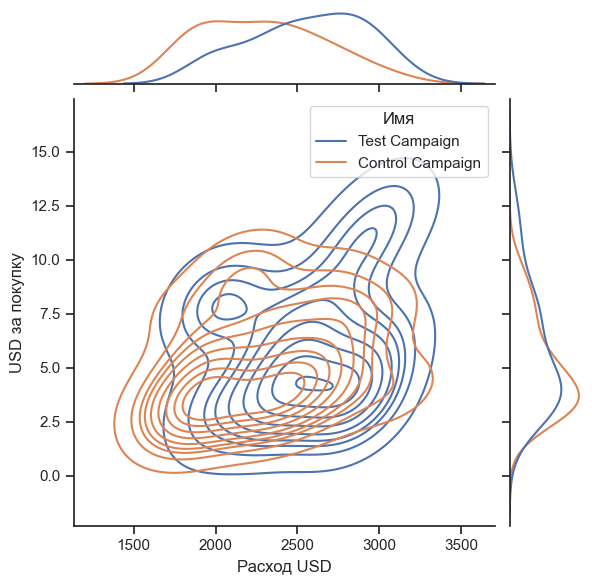

In [208]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="Расход USD", y="USD за покупку", hue="Имя",
    kind="kde",
)
plt.show('png')

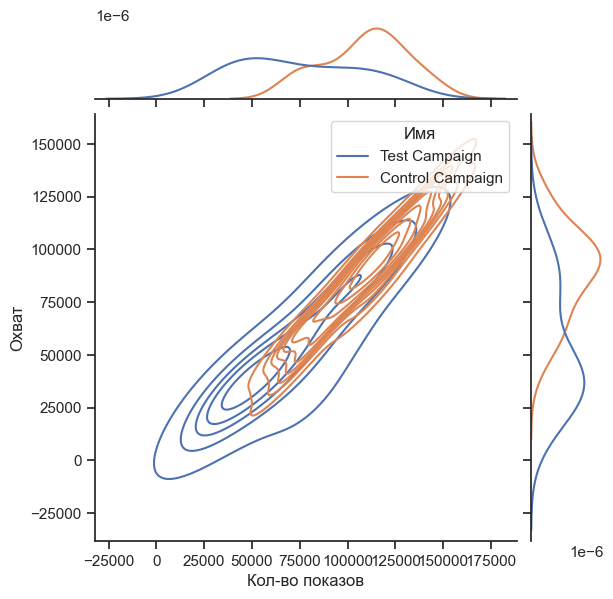

In [209]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="Кол-во показов", y="Охват", hue="Имя",
    kind="kde",
)
plt.show('png')

#### Проверка гипотез

<b>Идея 1.</b> Проверка новой и старой кампаний на предмет эффективности расходов.

In [210]:
total_spend = df.groupby(['Имя'])['Расход USD'].sum().reset_index()
total_spend

,Имя,Расход USD
0,Control Campaign,68653.0
1,Test Campaign,76892.0


In [211]:
spend_per_purchase = df.groupby(['Имя'])['USD за покупку'].mean().reset_index()
spend_per_purchase

,Имя,USD за покупку
0,Control Campaign,4.990667
1,Test Campaign,5.900000


Из цифр видно, что тестовая компания требует больших расходов, но является ли эта разница статистически значимой или скорее случайной?
Чтобы ответить на этот вопрос, проведем статистический тест.

Для начала определимся с распределением данных

In [212]:
data_1 = df.loc[df['Имя']=='Control Campaign']['USD за покупку'].values
data_2 = df.loc[df['Имя']=='Test Campaign']['USD за покупку'].values

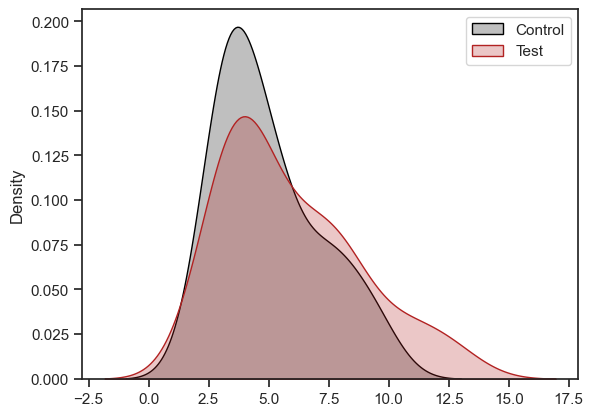

In [213]:
sns.kdeplot(data_1, label="Control", fill = True, color = '#000000')
sns.kdeplot(data_2, label="Test", fill = True, color = '#B22222')
plt.legend()
plt.show('png')

In [214]:
stat, p = st.shapiro(data_1)

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat = 0.905, p = 0.01117
Вероятно не нормальное распределение


In [215]:
stat, p = st.shapiro(data_2)

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat = 0.896, p = 0.00689
Вероятно не нормальное распределение


Распределение ненормальное, поэтому будем использовать критерий Манна-Уитни

In [216]:
stat, p = st.mannwhitneyu(data_1, data_2)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, разницы, вероятно, нет')
else:
    print('Отклоняем нулевую гипотезу, разница, вероятно, есть')

Статистика = 367.00000, p = 0.22255
Не отклоняем нулевую гипотезу, разницы, вероятно, нет


<b>Вывод.</b> Тест не показал наличие статистически значимой разницы в расходах - при текущих данных мы не можем утверждать, что тестовая компания будет обходится нам дороже.

<b>Идея 2.</b> Проверка новой и старой кампаний на предмет увеличения числа покупок.

In [217]:
num_of_purchase = df.groupby(['Имя'])['Кол-во покупок'].sum().reset_index()
num_of_purchase

,Имя,Кол-во покупок
0,Control Campaign,15736.6
1,Test Campaign,15637.0


Цифры показывают незначительное падение продаж для новой кампании, но является ли оно статистически значимым?

In [218]:
data_1 = df.loc[df['Имя']=='Control Campaign']['Кол-во покупок'].values
data_2 = df.loc[df['Имя']=='Test Campaign']['Кол-во покупок'].values

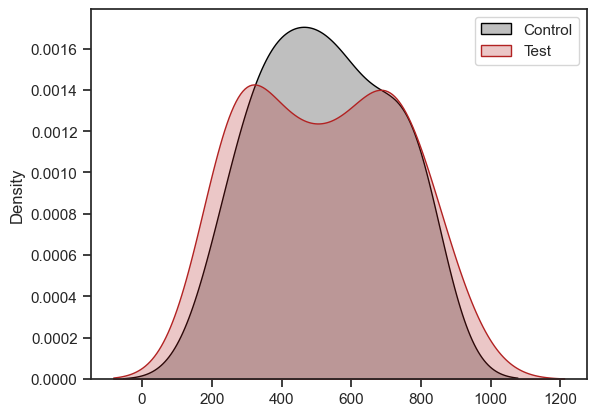

In [219]:
sns.kdeplot(data_1, label="Control", fill = True, color = '#000000')
sns.kdeplot(data_2, label="Test", fill = True, color = '#B22222')
plt.legend()
plt.show('png')

In [220]:
stat, p = st.shapiro(data_1)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

Статистика = 0.94406, p = 0.11700
Вероятно нормальное распределение


In [221]:
stat, p = st.shapiro(data_2)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

Статистика = 0.91819, p = 0.02408
Вероятно не нормальное распределение


Распределение ненормальное, поэтому будем использовать критерий Манна-Уитни

In [222]:
stat, p = st.mannwhitneyu(data_1, data_2)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 456.00000, p = 0.93519
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


<b>Вывод.</b> Тест не показал наличие статистически значимой разницы в продажах - при текущих данных мы не можем утверждать, что тестовая компания уменьшает или увеличивает продажи.

<b>Идея 3.</b> Проверка новой и старой кампаний на предмет увеличения конверсии клиентов.

In [223]:
df_2 = df.copy()
df_2 = df_2.drop(['Дата'], axis=1)
df_2['Имя'] = pd.get_dummies(df_2['Имя'], drop_first=True)
df_2 = df_2.reset_index(drop=True)
test_g = df_2[df_2['Имя']==1]
control_g = df_2[df_2['Имя']==0]

In [224]:
test_group = test_g['Конверсия(%)']
test_group.describe()

count    30.000000
mean      9.230667
std       4.449266
min       3.010000
25%       6.570000
50%       8.450000
75%      11.667500
max      21.090000
Name: Конверсия(%), dtype: float64

In [225]:
control_group = control_g['Конверсия(%)']
control_group.describe()

count    30.000000
mean     11.428000
std       6.725037
min       3.350000
25%       6.315000
50%      10.110000
75%      14.365000
max      32.240000
Name: Конверсия(%), dtype: float64

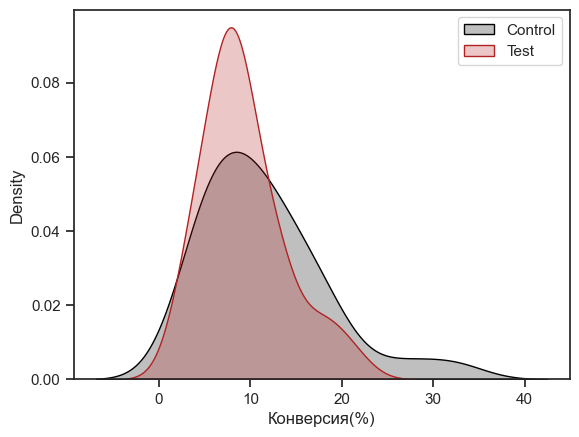

In [226]:
sns.kdeplot(control_group, label="Control", fill = True, color = '#000000')
sns.kdeplot(test_group, label="Test", fill = True, color = '#B22222')
plt.legend()
plt.show('png')

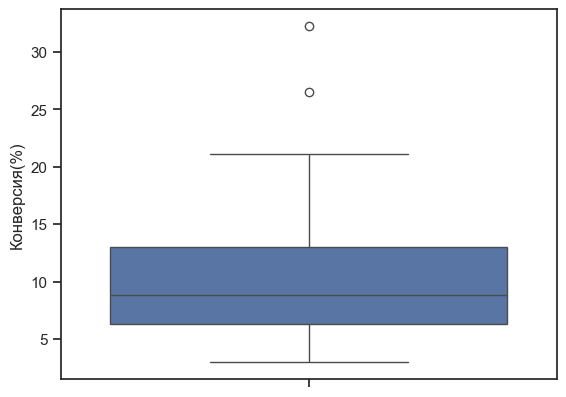

In [227]:
sns.boxplot(df['Конверсия(%)']);

Наблюдаем несколько необычно больших значений конверсии. Такие события происходят редко, поэтому мы можем исключить их из рассмотрения.

In [228]:
print(np.where(df['Конверсия(%)']>25))

(array([39, 41], dtype=int64),)


In [229]:
df_2 = df_2[df_2['Конверсия(%)']<25]
test_g = df_2[df_2['Имя']==1]
control_g = df_2[df_2['Имя']==0]
test_group = test_g['Конверсия(%)']
control_group = control_g['Конверсия(%)']

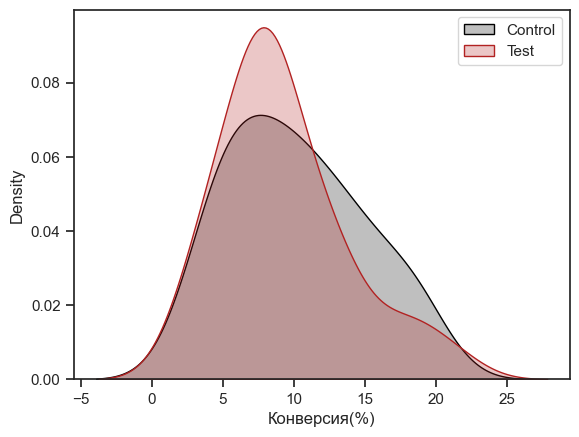

In [230]:
sns.kdeplot(control_group, label="Control", fill = True, color = '#000000')
sns.kdeplot(test_group, label="Test", fill = True, color = '#B22222')
plt.legend()
plt.show('png')

In [231]:
stat, p = st.shapiro(test_group)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

Статистика = 0.92547, p = 0.03726
Вероятно не нормальное распределение


In [232]:
stat, p = st.shapiro(control_group)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

Статистика = 0.94742, p = 0.17053
Вероятно нормальное распределение


Используем критерий Манна-Уитни.

In [233]:
stat, p = st.mannwhitneyu(control_group, test_group)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, разницы, вероятно, нет')
else:
    print('Отклоняем нулевую гипотезу, разница, вероятно, есть')

Статистика = 463.50000, p = 0.50341
Не отклоняем нулевую гипотезу, разницы, вероятно, нет


А что если использовать тест Стъюдента, ведь распределения данных близко к нормальным. Для этого необходимо вначале проверить равенство вариаций.

In [234]:
stat, p = st.levene(control_group, test_group)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу >> Вариация в группах одинаковая")
else:
    print("Отклоняем нулевую гипотезу >> Вариация в группах различается")

Статистика = 0.84939, p = 0.36068
Не отклоняем нулевую гипотезу >> Вариация в группах одинаковая


In [235]:
stat, p = st.ttest_ind(control_group, test_group)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 0.75885, p = 0.45113
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


In [236]:
import requests
import time
import pandas as pd
from bs4 import BeautifulSoup
pages = 1

keywords = ['скраппинг', 'парсинг']

def scrap_habr_by_word(key_word):
    URL = f'https://habr.com/ru/search/?q={key_word}&target_type=posts&order=relevance'
    req = requests.get(URL)
    time.sleep(0.3)
    soup = BeautifulSoup(req.text, features="html.parser")
    news_blocks = soup.find_all('article', class_='tm-articles-list__item')
    headers = []
    links = []
    dts = []

    for e in news_blocks:
        dts.append(e.find('time').get_text())
        el = e.find(class_='tm-title__link')
        headers.append(el.find('span').get_text())
        links.append(f"https://habr.com/{el['href']}")
    data = {'date': dts, 'header': headers, 'link': links}
    return pd.DataFrame(data)


def scrap_habr(keywords):
    data = pd.DataFrame({'date': [], 'header': [], 'link': []})
    for key in keywords:
        data = pd.concat([data, scrap_habr_by_word(key)])
    return data.drop_duplicates()

scrap_habr(keywords)

,date,header,link
0,28 июл 2022 в 11:01,Парсинг сайтов судов общей юрисдикции в России,https://habr.com//ru/articles/679514/
1,2 мая 2020 в 23:42,Большой туториал по обработке спортивных данны...,https://habr.com//ru/articles/500162/
2,14 фев 2013 в 14:46,Парсинг сайтов-магазинов. Личный опыт и немног...,https://habr.com//ru/articles/169409/
3,8 авг 2019 в 12:41,Web scraping с помощью R. Сравнение оценок фил...,https://habr.com//ru/articles/462917/
4,13 авг 2021 в 14:30,Киберпреступность: последствия для бизнеса,https://habr.com//ru/articles/572808/
5,30 мар в 17:04,Автоматизируем поиск ценной информации в групп...,https://habr.com//ru/articles/804111/
6,22 ноя 2016 в 17:24,Еще примеры использования R для решения практи...,https://habr.com//ru/articles/315870/
7,7 окт в 20:20,Предварительная обработка данных в машинном об...,https://habr.com//ru/companies/skillfactory/ar...
8,8 сен 2022 в 18:50,Со Stable Diffusion вы можете больше никогда н...,https://habr.com//ru/companies/jugru/articles/...
9,9 сен 2020 в 16:44,Ruby Digest 2020·08·2,https://habr.com//ru/articles/516722/


<b>Вывод.</b> Тест не показал наличие статистически значимой разницы в конверсии. На основе трех проведенных исследований можно утверждать, что новая кампания не позволяет улучшить показатели ни по одному из трех критериев.

## Еще один пример проведения A/B теста

Cookie Cats - когда-то популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень.

По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать некоторое количество времени или совершать покупки в приложении, чтобы продолжить.

<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, надо рассмотреть влияние изменений на удержание игроков.

### Данные A/B тестирования

In [237]:
data = pd.read_csv('https://raw.githubusercontent.com/obulygin/SkillFactory/main/cookie_cats.csv', index_col='Unnamed: 0')
data

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.</b>

In [238]:
# Посмотрим на количество участников теста.
data.groupby('version').version.count()

version
gate_30    44700
gate_40    45489
Name: version, dtype: int64

In [239]:
data.groupby('version').sum()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,222944098441,2344795,20034,8502
gate_40,227857702576,2333530,20119,8279


In [240]:
data.groupby('version').mean()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,4.987564e+06,52.456264,0.448188,0.190201
gate_40,5.009073e+06,51.298776,0.442283,0.182000


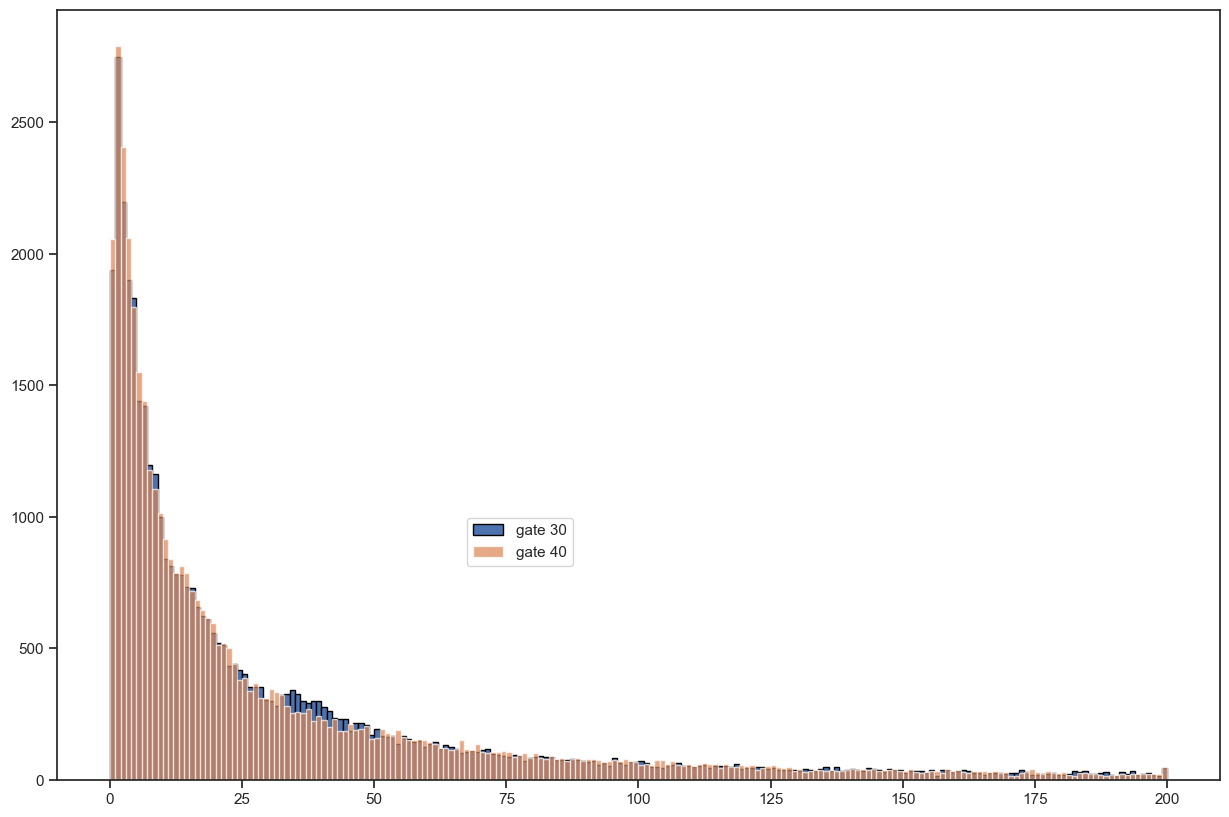

In [241]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
# возьмем только пользователей, которые достаточно играли в игру
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1,
         edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show('png')

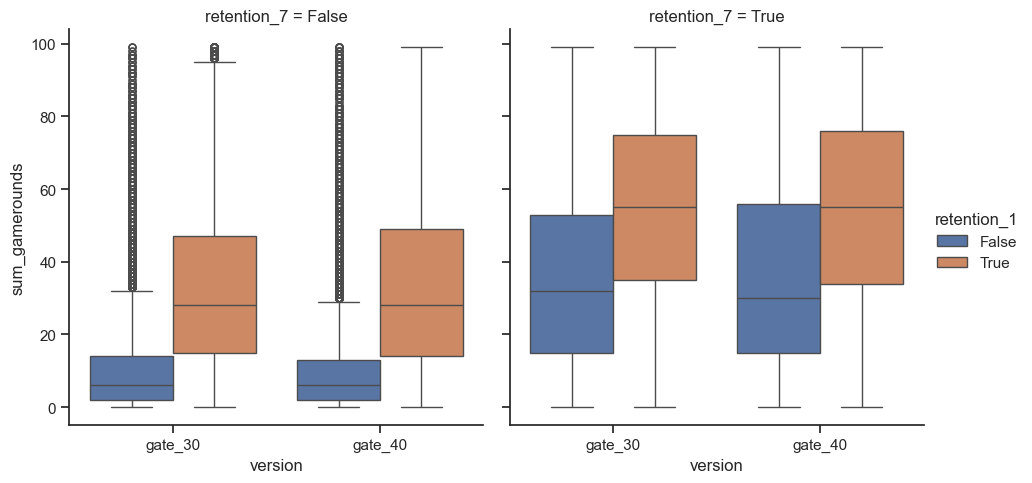

In [242]:
df = data.loc[data['sum_gamerounds'] < 100].copy()

sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95)


In [243]:
from scipy.stats import mannwhitneyu
import scipy.stats as stats

stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])

print(f'Статистика={stat :.3f}, p={p :.5f}')
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, разницы, вероятно, нет')
else:
    print('Отклоняем нулевую гипотезу, разница, вероятно, есть')


Статистика=1024331250.500, p=0.05021
Не отклоняем нулевую гипотезу, разницы, вероятно, нет


Применяем Bootstrap для того, чтобы более наглядно убедиться в наличии различий

version,gate_30,gate_40
retention_7,0.187067,0.182348
retention_7,0.192722,0.182825
retention_7,0.189895,0.182692
retention_7,0.189967,0.182184
retention_7,0.195039,0.182069
...,...,...
retention_7,0.191249,0.181879
retention_7,0.192797,0.181700
retention_7,0.188112,0.182444
retention_7,0.189177,0.181458


<Axes: ylabel='Density'>

<Figure size 1500x1000 with 0 Axes>

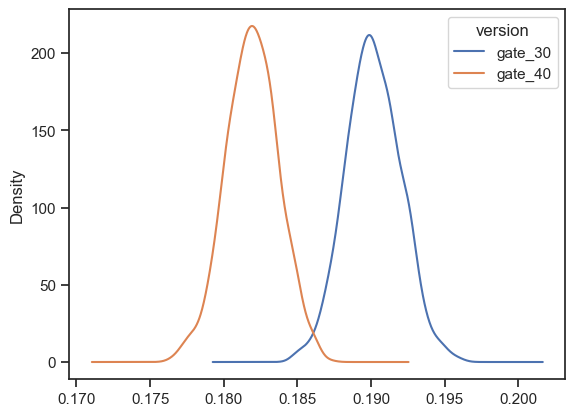

In [244]:
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac=1, replace=True).groupby(
        'version')['retention_7'].mean()  # retention_1
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
display(boot_1d)
# График полученного распределения
boot_1d.plot(kind='density')

Прежде чем использовать t-тест, необходимо проверить равенство дисперссий. Сделаем это с помощью <a href="https://ru.wikipedia.org/wiki/F-%D1%82%D0%B5%D1%81%D1%82">F-теста</a>. Используем собстенную функцию.

In [245]:
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-st.f.cdf(f, nun, dun)
    return f, p_value

In [246]:
stat, p = f_test(boot_1d['gate_30'], boot_1d['gate_40'])

print(f'Статистика={stat :.3f}, p={p :.3f}')

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются')

Статистика=1.091, p=0.084
Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые


Теперь можно использовать t-критерий Стьюдента!

In [247]:
stat, p = st.ttest_ind(boot_1d['gate_30'], boot_1d['gate_40'])

print(f'Статистика={stat :.3f}, p={p :.3f}')

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=101.272, p=0.000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


<b>Выводы.</b> Наше значение $p$ близко к нулю, поэтому мы отвергаем нулевую гипотезу о том, что средние значения двух выборок одинаковые. То есть существует статистически значимая разница между тем где поставить ворота!